In [42]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import matplotlib
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

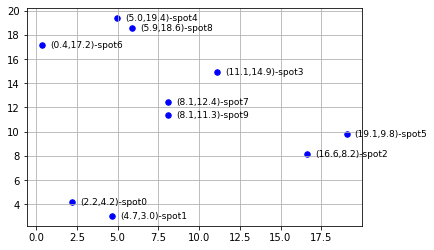

In [69]:
np.random.seed(121)
var = ['X', 'Y']
labels = ['spot0', 'spot1', 'spot2', 'spot3', 'spot4', 
          'spot5', 'spot6', 'spot7', 'spot8', 'spot9']
X = np.random.random_sample([10,2])*20
df = pd.DataFrame(X, columns = var, index = labels)
#df는 점5개의 x,y 좌표를 저장해둠

plt.scatter(X[:,0], X[:,1], c = 'blue', marker = 'o', s = 30)
plt.grid(True)
i=0
for i in range(0,10):
    str_val = "(%.1f,%.1f)-%s"%(X[i,0], X[i,1], labels[i])
    plt.text(X[i,0]+0.5, X[i,1], str_val, fontsize=9, color='black',
             horizontalalignment = 'left', verticalalignment = 'center')

plt.show()

In [45]:
distmatrix = pdist(df, metric = 'euclidean')
row_dist = pd.DataFrame(squareform(distmatrix), columns = labels, index = labels)
print(row_dist)

           spot0      spot1      spot2      spot3      spot4      spot5  \
spot0   0.000000   2.702177  14.907854  13.906960  15.404095  17.728641   
spot1   2.702177   0.000000  12.995225  13.513763  16.337252  15.901932   
spot2  14.907854  12.995225   0.000000   8.700927  16.158949   2.947552   
spot3  13.906960  13.513763   8.700927   0.000000   7.595185   9.442336   
spot4  15.404095  16.337252  16.158949   7.595185   0.000000  17.030975   
spot5  17.728641  15.901932   2.947552   9.442336  17.030975   0.000000   
spot6  13.069894  14.751805  18.561989  10.981101   5.111790  20.083070   
spot7  10.113505  10.019453   9.526019   3.893467   7.597826  11.271468   
spot8  14.840142  15.602885  14.941979   6.378021   1.220409  15.816838   
spot9   9.245957   8.996216   9.069858   4.661163   8.620306  11.050483   

           spot6      spot7      spot8      spot9  
spot0  13.069894  10.113505  14.840142   9.245957  
spot1  14.751805  10.019453  15.602885   8.996216  
spot2  18.561989  

In [72]:
row_clusters = linkage(distmatrix, method = 'average')

pd.DataFrame(row_clusters,
            columns=['클러스터ID_1', '클러스터ID_2', '거리', '클러스터 멤버수'],
            index = ['클러스터 %d' %(i+10) for i in range(row_clusters.shape[0])])

,클러스터ID_1,클러스터ID_2,거리,클러스터 멤버수
클러스터 10,7.0,9.0,1.103549,2.0
클러스터 11,4.0,8.0,1.220409,2.0
클러스터 12,0.0,1.0,2.702177,2.0
클러스터 13,2.0,5.0,2.947552,2.0
클러스터 14,3.0,10.0,4.277315,3.0
클러스터 15,6.0,11.0,5.418614,3.0
클러스터 16,14.0,15.0,8.222108,6.0
클러스터 17,12.0,16.0,12.983494,8.0
클러스터 18,13.0,17.0,13.949284,10.0


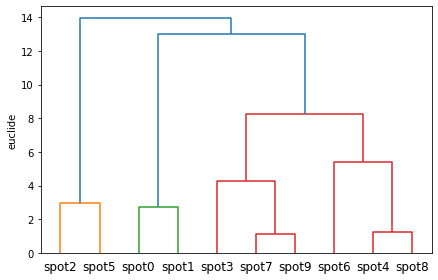

In [71]:
row_dendr = dendrogram(row_clusters, labels = labels)
plt.tight_layout()
plt.ylabel('euclide')
plt.show()